# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Fikrizza
- **Email:** m179d4ky2229@bangkit.academy
- **ID Dicoding:** muhammad_fikrizza

## Menentukan Pertanyaan Bisnis

- Bagaimana suhu lingkungan berpengaruh pada jumlah penggunaan sepeda?
- Bagaimana waktu mempengaruhi jumlah penggunaan sepeda

## Import Semua Packages/Library yang Digunakan

In [1]:
#Import all the packages needed
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Wrangling

### Gathering Data

In [2]:
#Load the dataset and preview data
bike_data = pd.read_csv('data/hour.csv')
bike_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [3]:
#Get info about the dataset
print(bike_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


In [4]:
#Checking for each column that had missing value
print("Sum each column missing value :")
print(bike_data.isnull().sum())

Sum each column missing value :
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [5]:
#Checking column that had duplicate data
bike_data.duplicated().sum()

0

### Cleaning Data

In [6]:
#Drop cloumn that don't needed for visualization
bike_data.drop('instant', axis=1, inplace=True)
bike_data.drop('dteday', axis=1, inplace=True)

## Exploratory Data Analysis (EDA)

In [7]:
#Describing the dataset 
bike_data.describe(include="all")

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Explore correlation data day.csv

<Axes: >

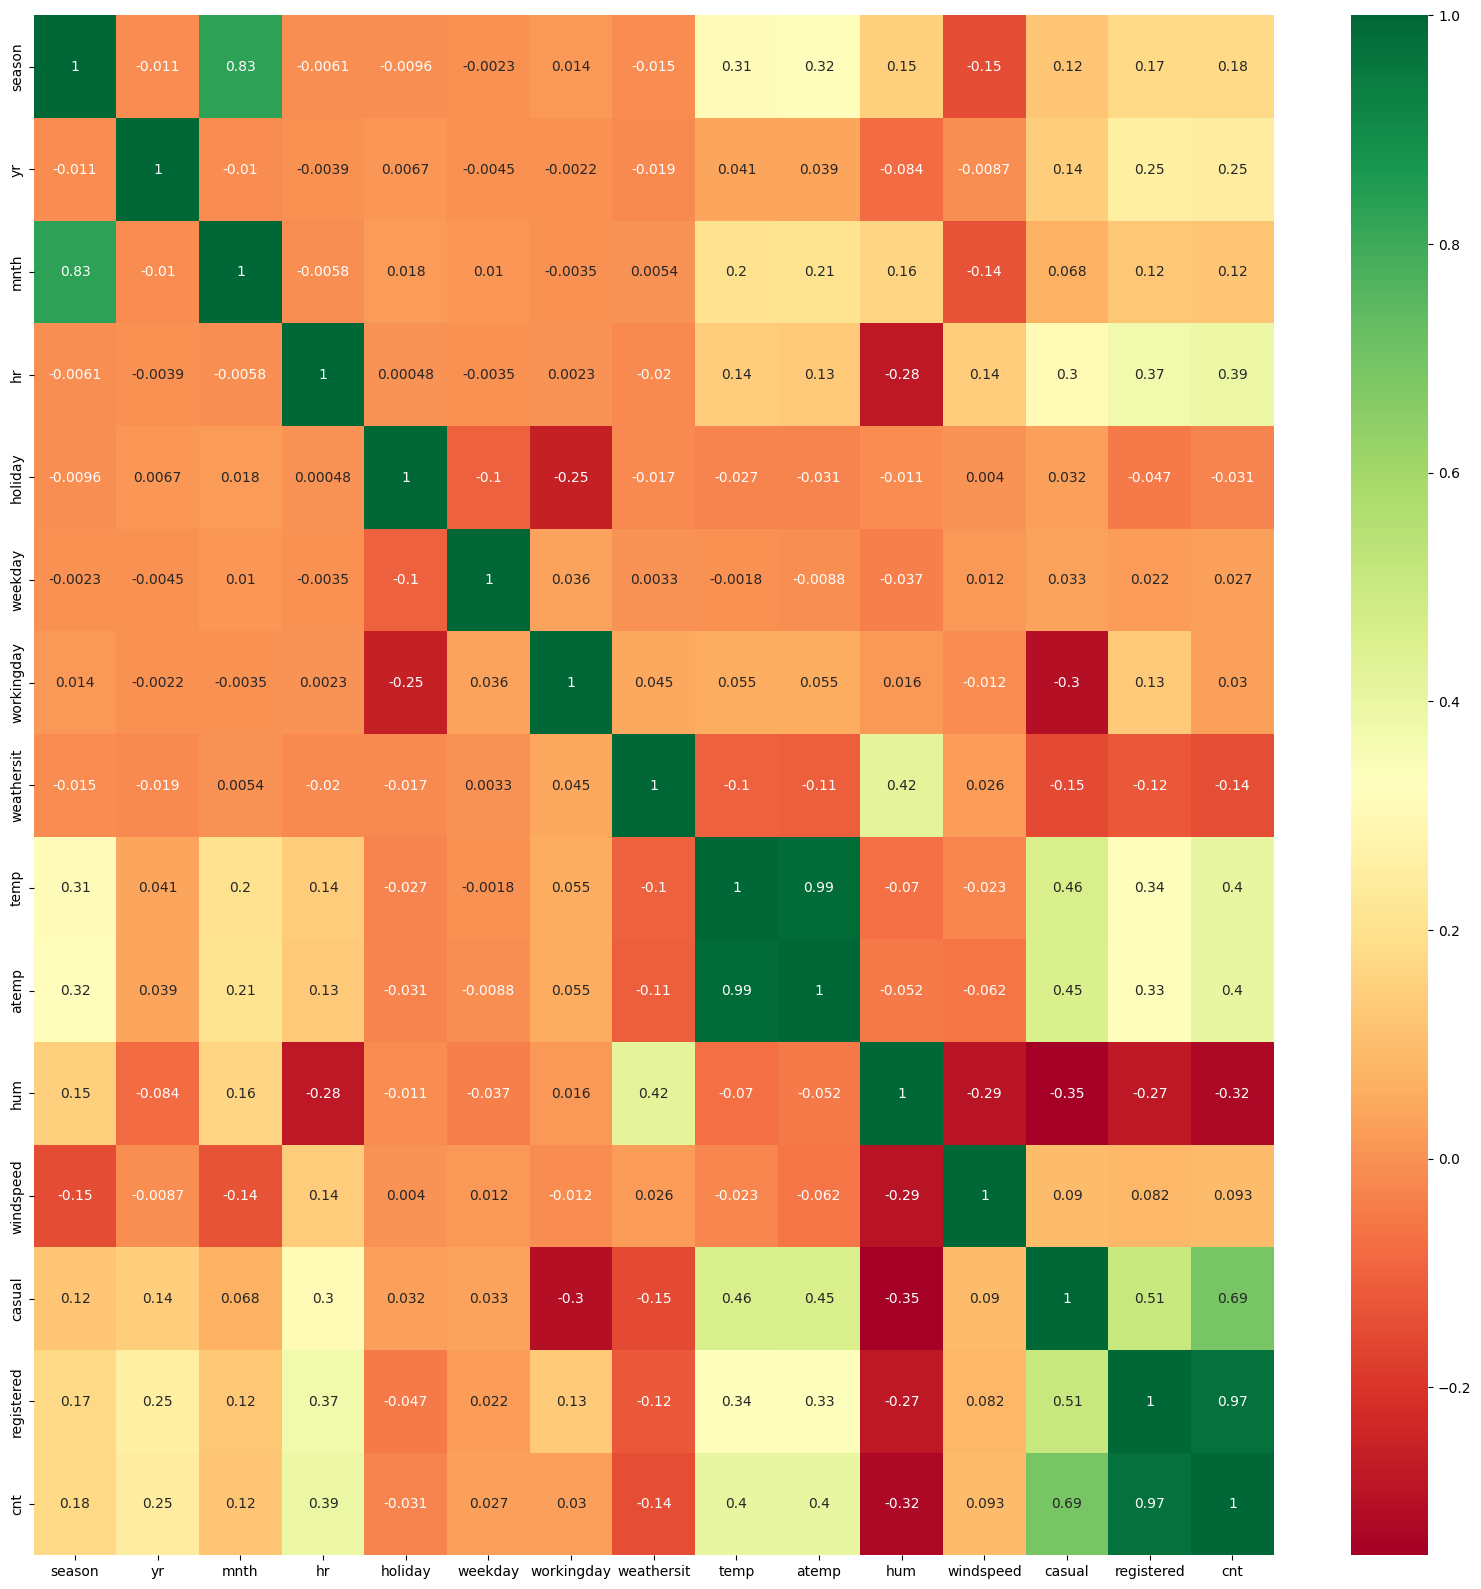

In [8]:
#Checking correlation for each column
plt.figure(figsize=(20, 20))
sns.heatmap(bike_data.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":10})

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [9]:
#Transform column to numpy array
temp = bike_data[:]['temp'].to_numpy()
cnt = bike_data[:]['cnt'].to_numpy()

In [10]:
#Get slope and intercept from coefficient to make regression line
coefficients = np.polyfit(temp, cnt, 1)
slope, intercept = coefficients

# Generate y values for the regression line
regression_line = slope * temp + intercept

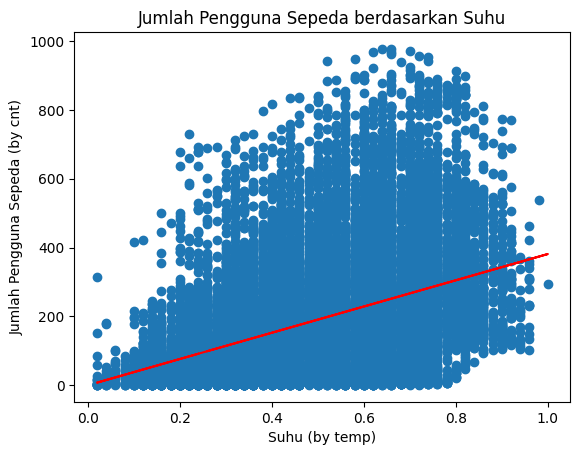

In [11]:
#Make Sccater plot
plt.scatter(bike_data['temp'], bike_data['cnt'], label='Data Points')
plt.plot(temp, regression_line, label='Regression Line', color='red')

# Adding Title dan label
plt.title('Jumlah Pengguna Sepeda berdasarkan Suhu')
plt.xlabel('Suhu (by temp)')
plt.ylabel('Jumlah Pengguna Sepeda (by cnt)')

# Show plot
plt.show()

### Pertanyaan 2:

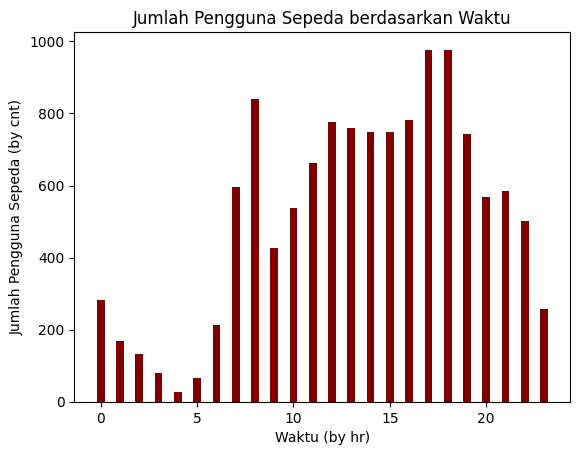

In [12]:
#Make Bar plot
plt.bar(bike_data['hr'], bike_data['cnt'], color ='maroon', 
        width = 0.4)

# Adding title and label
plt.title('Jumlah Pengguna Sepeda berdasarkan Waktu')
plt.xlabel('Waktu (by hr)')
plt.ylabel('Jumlah Pengguna Sepeda (by cnt)')

# Show plot
plt.show()

## Conclusion

- Conclution pertanyaan 1 adalah suhu mempengaruhi jumlah penggunaan sepeda dimana ditunjukkan dengan nilai korelasi 0.4. Berdasarkan visualisasi data yang dilakukan juga diketahui bahwa, semakin tinggi suhu maka akan semakin meningkat jumlah pesepeda. Hal tersebut bersesuaian dengan nilai korelasi yang positif
- Conclution pertanyaan 2 adalah jumlah pengguna sepeda menigkat pada waktu tertentu dimana waktu tersebut merupakan waktu berangkat kerja dan juga pulang kerja. Selain itu, waktu memiliki korelasi positif dengan jumlah pengguna sepeda dengan nilai 0.39. Hal tersebut juga dapat dilihat pada diagram bar diatas dimana semakin sore maka semakin banyak pengguna sepeda